### Homework 3.3 - Please Help The Cat

A poor cat is trapped on canvas by an evil witch. Please help releasing the cat by breaking the curse using Discrete Fourier Transform learned in our magic class.

You may find the image at `images/poor-cat-trapped-on-canvas.jpg`. Note that the image has 3 color channels (RGB).

Please remember that the examples shown in class uses the book of spells from the ancient library. Try searching the newer spells on the internet.

**You must show all the steps clearly. Write your explanation in the markdown boxes.**

<img src="images/poor-cat-trapped-on-canvas.jpg" alt="A poor cat trapped on canvas" width="400">

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import fftpack

Import the image and fft the image and shift in order for the image to be in the center

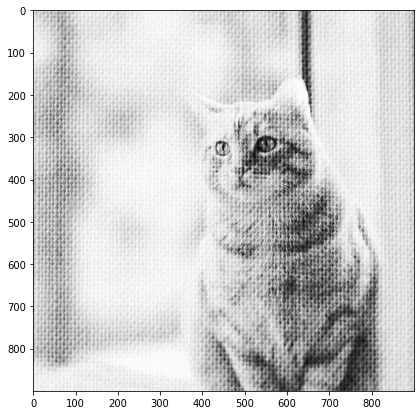

In [3]:
image = mpimg.imread('images/poor-cat-trapped-on-canvas.jpg')
gray_image = image[:,:,0]
norm = np.sqrt(gray_image.shape[0] * gray_image.shape[1])

D1 = fftpack.fft2(gray_image)/norm
D2 = fftpack.fftshift(D1)

D3 = fftpack.ifft2(D1)/norm
def to_real(x):
    return np.abs(x)**0.05
plt.figure(figsize=(14,7))
plt.imshow(np.abs(D3), cmap='gray')

In [4]:
to_real(D2[0][0])

0.914307826761828

### Frequency-domain data

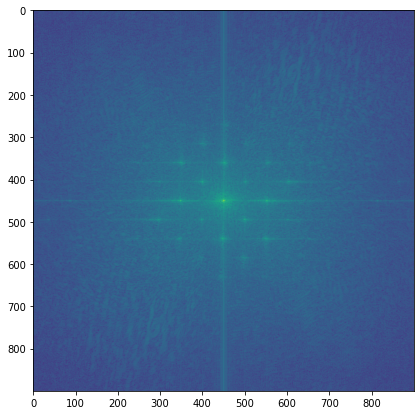

In [5]:
plt. figure(figsize=(14,7))
plt.imshow(to_real(D2))

In [6]:
print(to_real(D2)[449][450])

1.5556370701022582


Create the mask to multiply with the fft data

In [7]:
n = 900
Y, X = np.ogrid[:n, :n]
center = (int(n/2), int(n/2))
dist_from_center = np.sqrt((X - center[0])**2 + (Y-center[1])**2)
mask1 = np.where(dist_from_center <= 40,1,0)

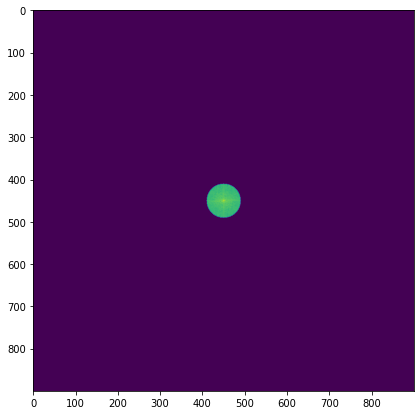

In [9]:
clean_freqt = D2*mask1
plt. figure(figsize=(14,7))
plt.imshow(to_real(clean_freqt))

In [11]:
rows, cols = np.where((to_real(D2) > 1.25))
mask = np.empty(shape=(900,900))
mask.fill(1)
mask[rows, cols] = 0

In [12]:
t=np.logical_xor(np.array(mask),np.array(mask1))

In [13]:
mask[448:450,450]

array([0., 0.])

 This is our mask

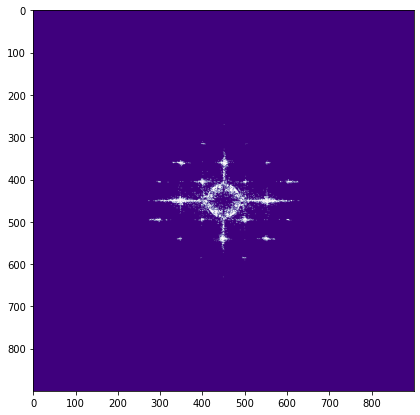

In [14]:
plt.figure(figsize=(14,7))
plt.imshow(t, cmap="Purples")

 Multiply the shifted fft data

In [15]:

clean_freq = D2*t

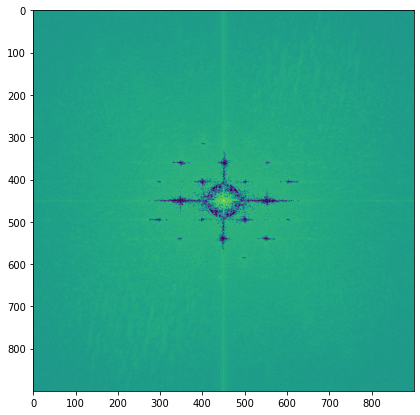

In [16]:
plt. figure(figsize=(14,7))
plt.imshow(to_real(clean_freq))

In [17]:
clean_img = fftpack.ifftshift(clean_freq)/norm

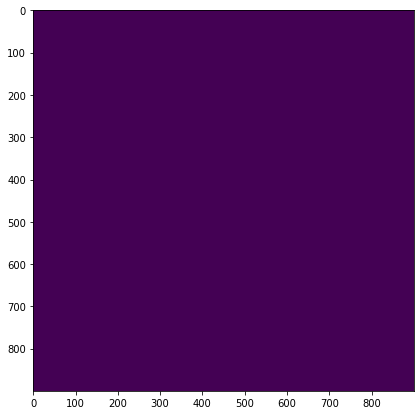

In [18]:
plt.figure(figsize=(14,7))
plt.imshow(np.abs(clean_img))

In [19]:
D4 = fftpack.ifft2(clean_img)/norm

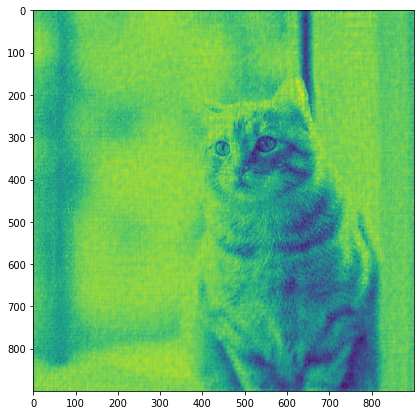

In [20]:
plt.figure(figsize=(14,7))
plt.imshow(np.abs(D4))

### Original image

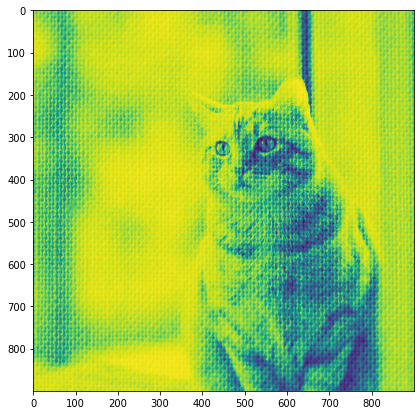

In [56]:
plt.figure(figsize=(14,7))
plt.imshow(np.abs(D3))